# *DFS*

<b>Depth-First Search 깊이 우선 탐색</b><br><br>
그래프는 <b>노드(Node)</b>와 <b>간선(Edge)</b>로 표현되며 두 노드가 간선으로 연결되면 <b>'두 노드는 인접하다'</b>라고 표현한다.
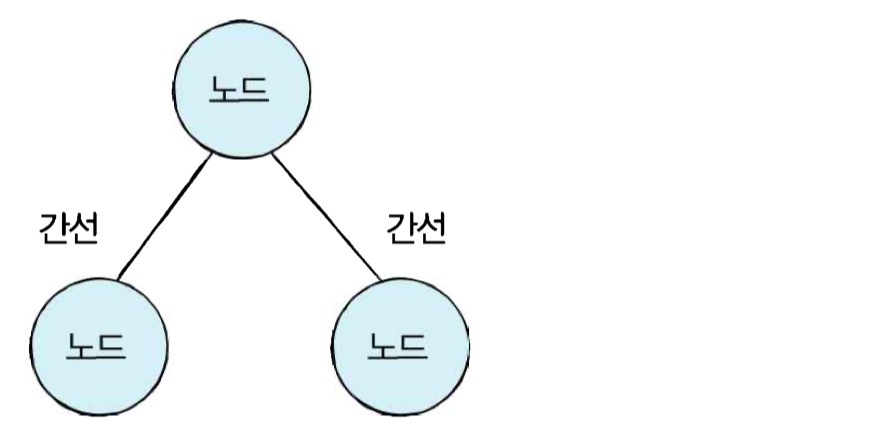

DFS에서는 두가지 방식이 존재<br>
<b>인접 행렬(Adjacency Matrix)</b> : 2차원 배열로 그래프의 연결 관계를 표현하는 방식<br>
<b>인접 리스트(Adjacency List)</b> : 리스트로 그래프의 연결 관계를 표현하는 방식

# 

# *인접 행렬(Adjacency Matrix)*

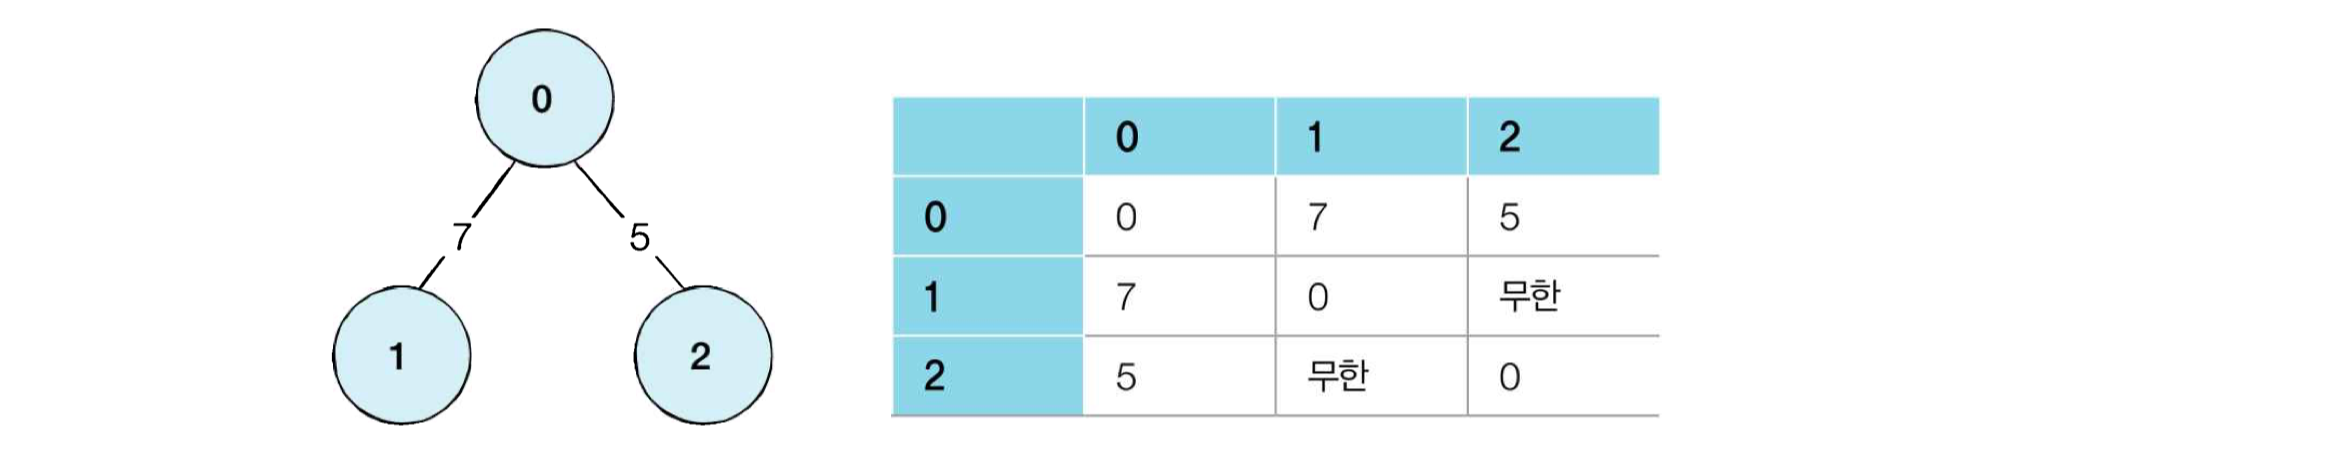
연결된 그래프를 인접 행렬로 표현할 때 2차원 리스트로 구현<br>
연결이 되어 있지 않는 노드는 무한의 비용이라 작성(999999999, 987654321)

In [1]:
INF = 999999999

graph = [
    [0, 7, 5],
    [7, 0, INF],
    [5, INF, 0]
]

In [2]:
print(graph)

[[0, 7, 5], [7, 0, 999999999], [5, 999999999, 0]]


# 

# *인접 리스트(Adjacency List)*
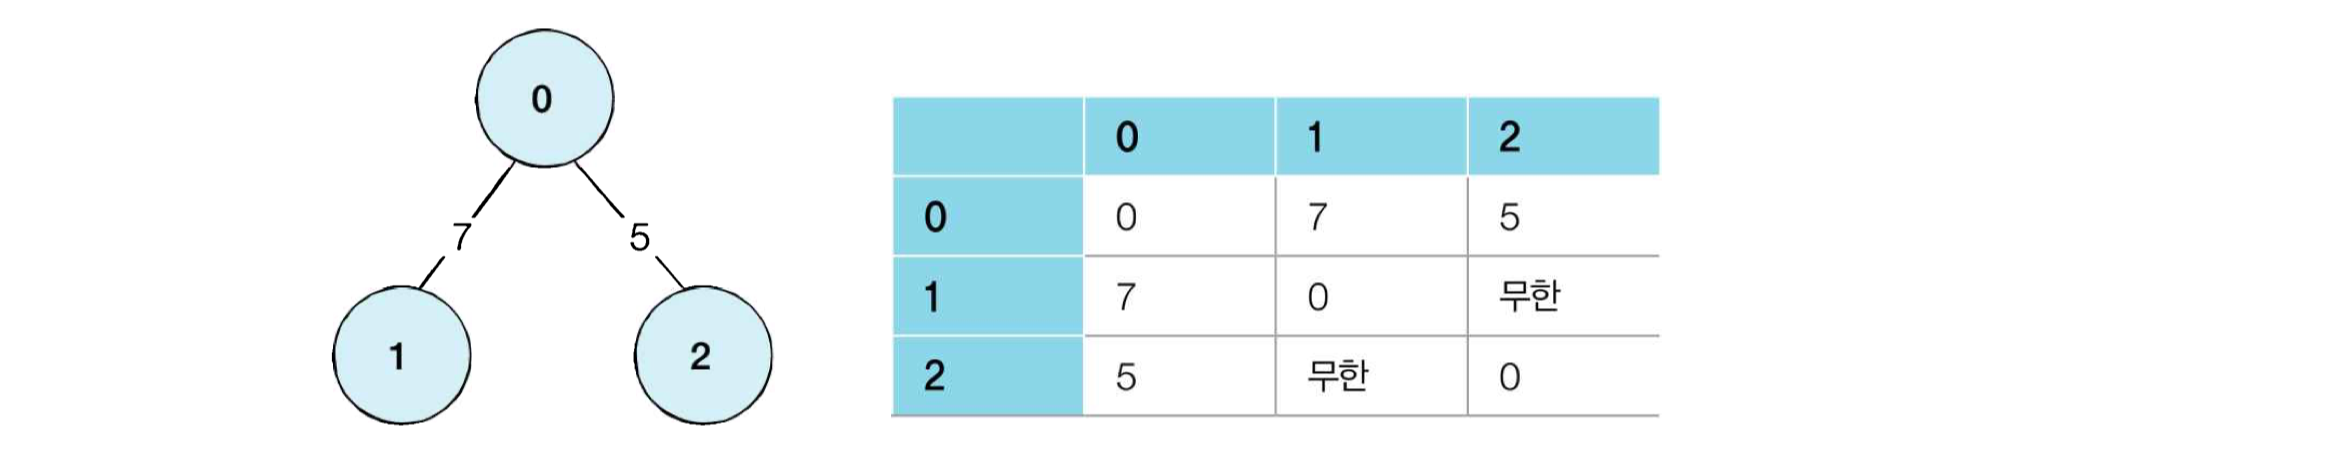

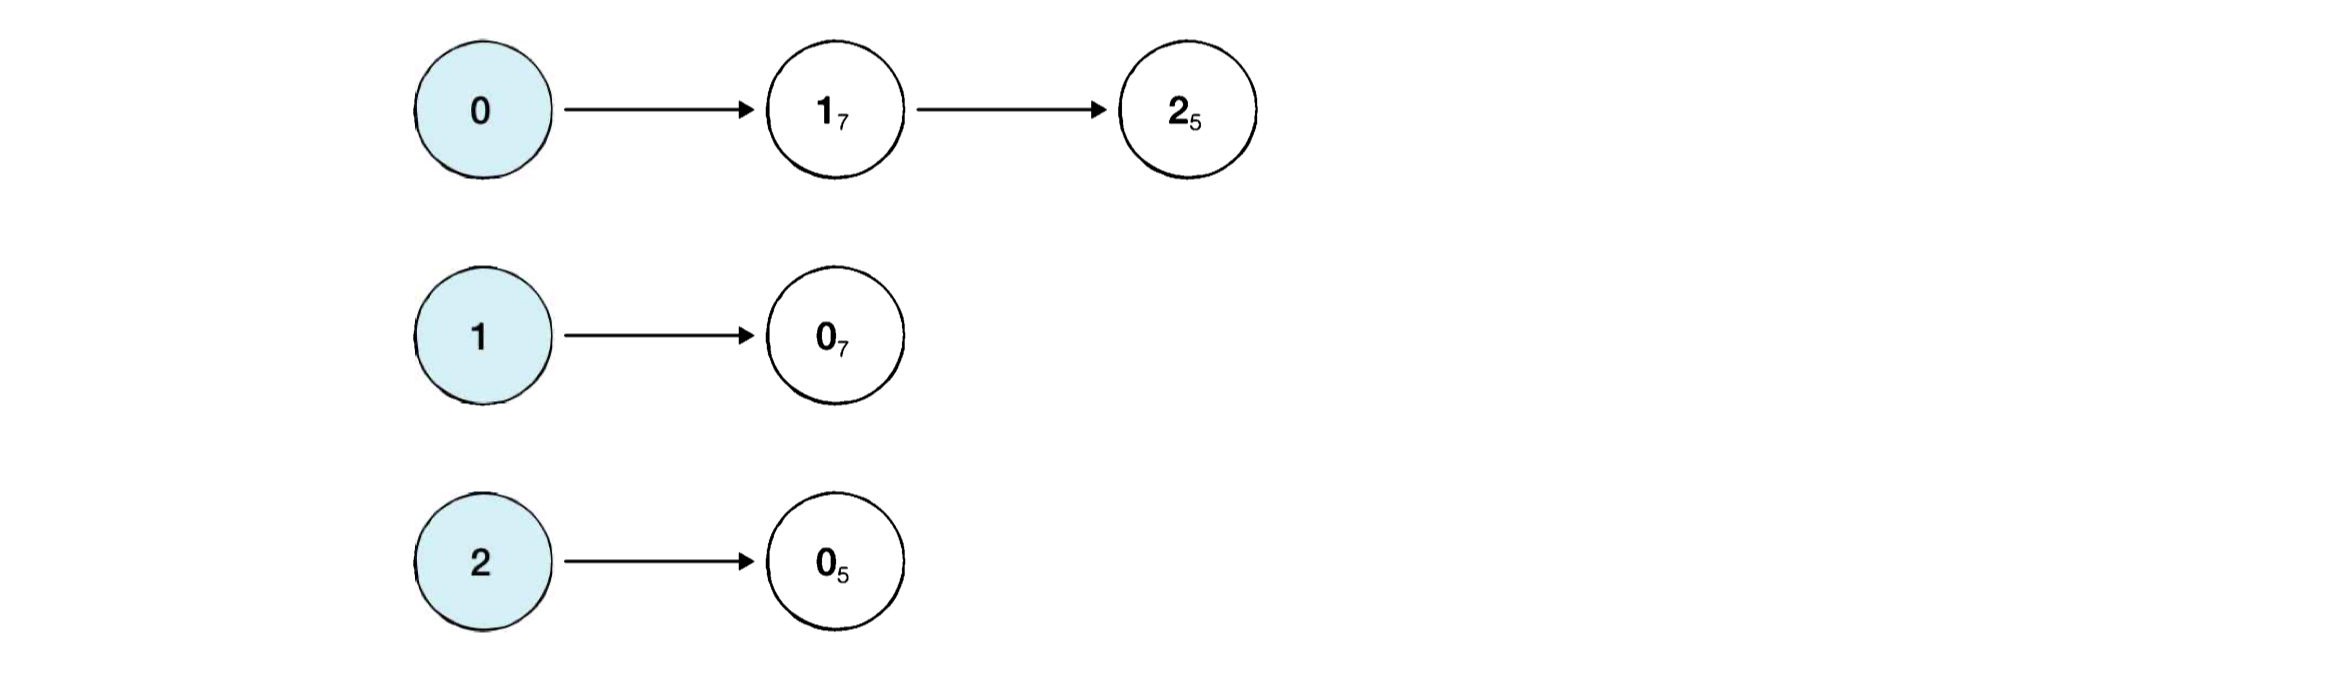
모든 노드에 연결된 노드에 대한 정보를 차례대로 연결하여 저장.

In [4]:
# row가 3개인 2차원 리스트
graph = [[] for _ in range(3)]

# node0 (node, distance)
graph[0].append((1, 7))
graph[0].append((2, 5))

# node1
graph[1].append((0, 7))

# node2
graph[2].append((0, 5))

print(graph)

[[(1, 7), (2, 5)], [(0, 7)], [(0, 5)]]


#### <big>인접 행렬 방식</big>은 모든 관계를 저장하므로 메모리가 불필요하게 저장되지만, 노드 간의 관계를 찾기에 용이하다

# 

# 👉🏻 *DFS 스택 자료구조 동작 과정*

1. 탐색 시작 노드를 스택에 삽입하고 <u>스택에 한 번 삽입된 노드가 다시 삽입되지 않도록 체크</u><br>
2. 스택의 최상단 노드에 방문하지 않은 인접 노드가 있으면 그 인접 노드를 스택에 넣고 방문 처리<br>
방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다.<br>
3. 2번 과정을 더 이상 수행할 수 없을 때까지 반복

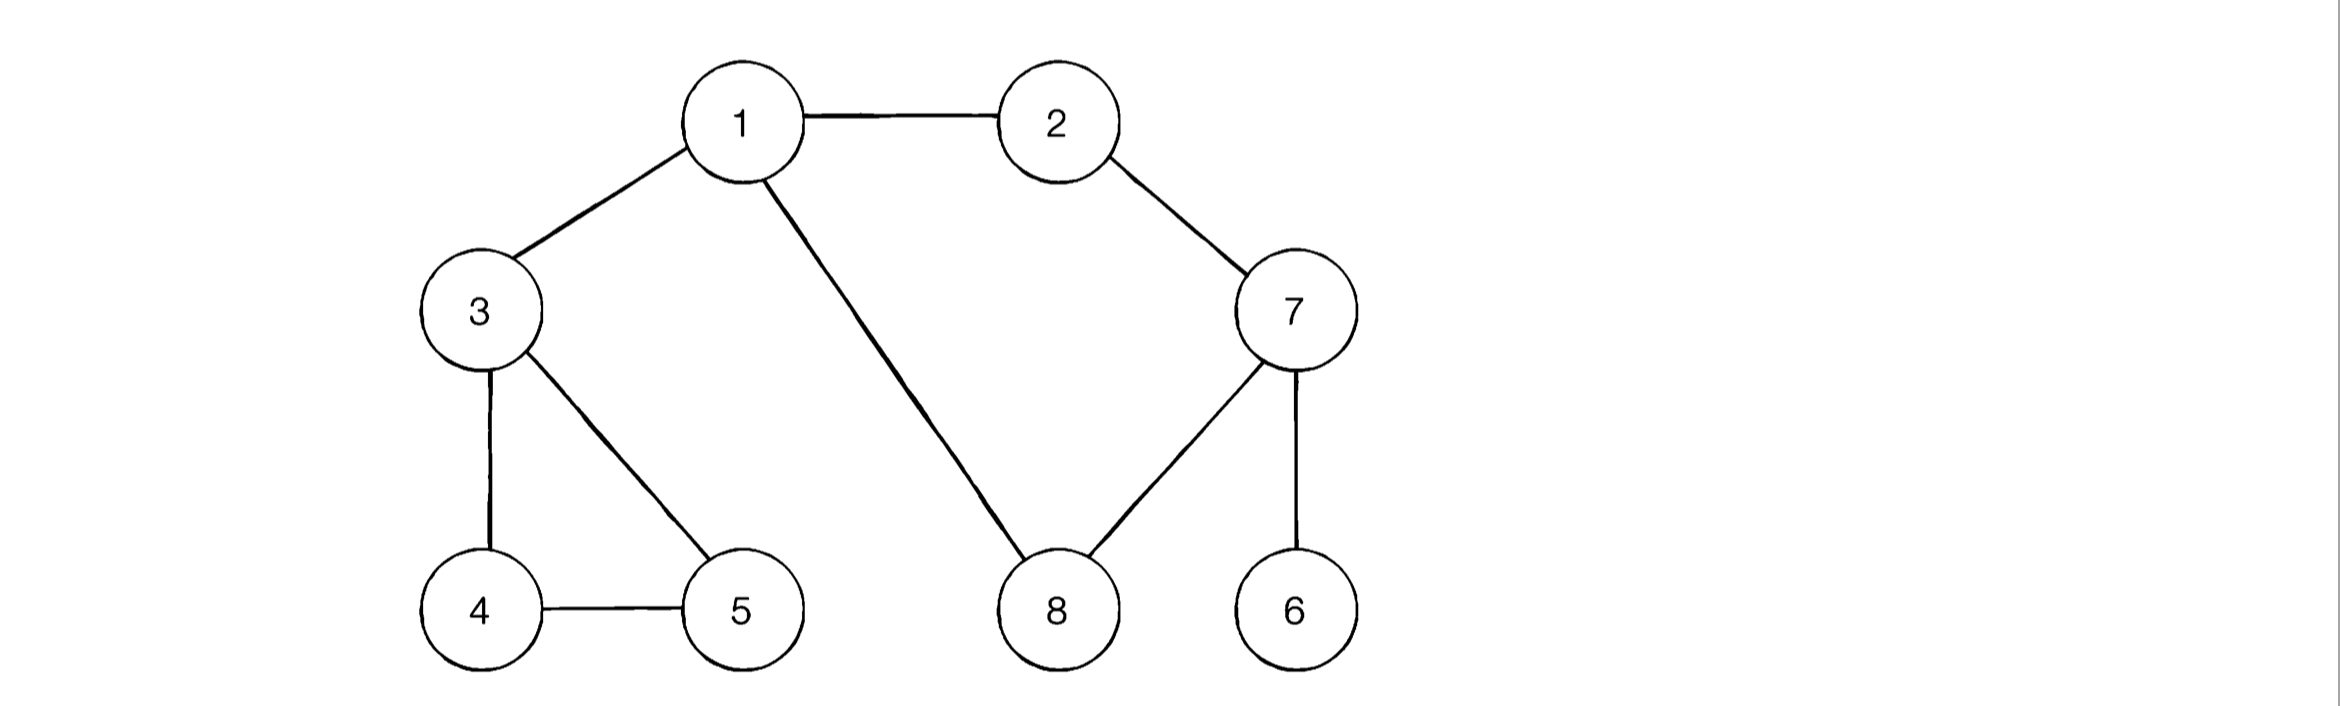

In [7]:
# 재귀 함수를 활용한 DFS
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end = ' ')
    
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)

In [9]:
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

visited = [False] * 9

print(f"graph : {graph}")
print(f"visited : {visited}")

graph : [[], [2, 3, 8], [1, 7], [1, 4, 5], [3, 5], [3, 4], [7], [2, 6, 8], [1, 7]]
visited : [False, False, False, False, False, False, False, False, False]


In [10]:
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

# 

# *BFS*
<b>Breadth First Search 너비 우선 탐색</b><br>
가까운 노드부터 탐색하는 알고리즘<br>
<u>선입선출 바잇ㄱ인 큐 자료구조를 이용하는 것이 정석</u>

# 👉🏻 *DFS 스택 자료구조 동작 과정*
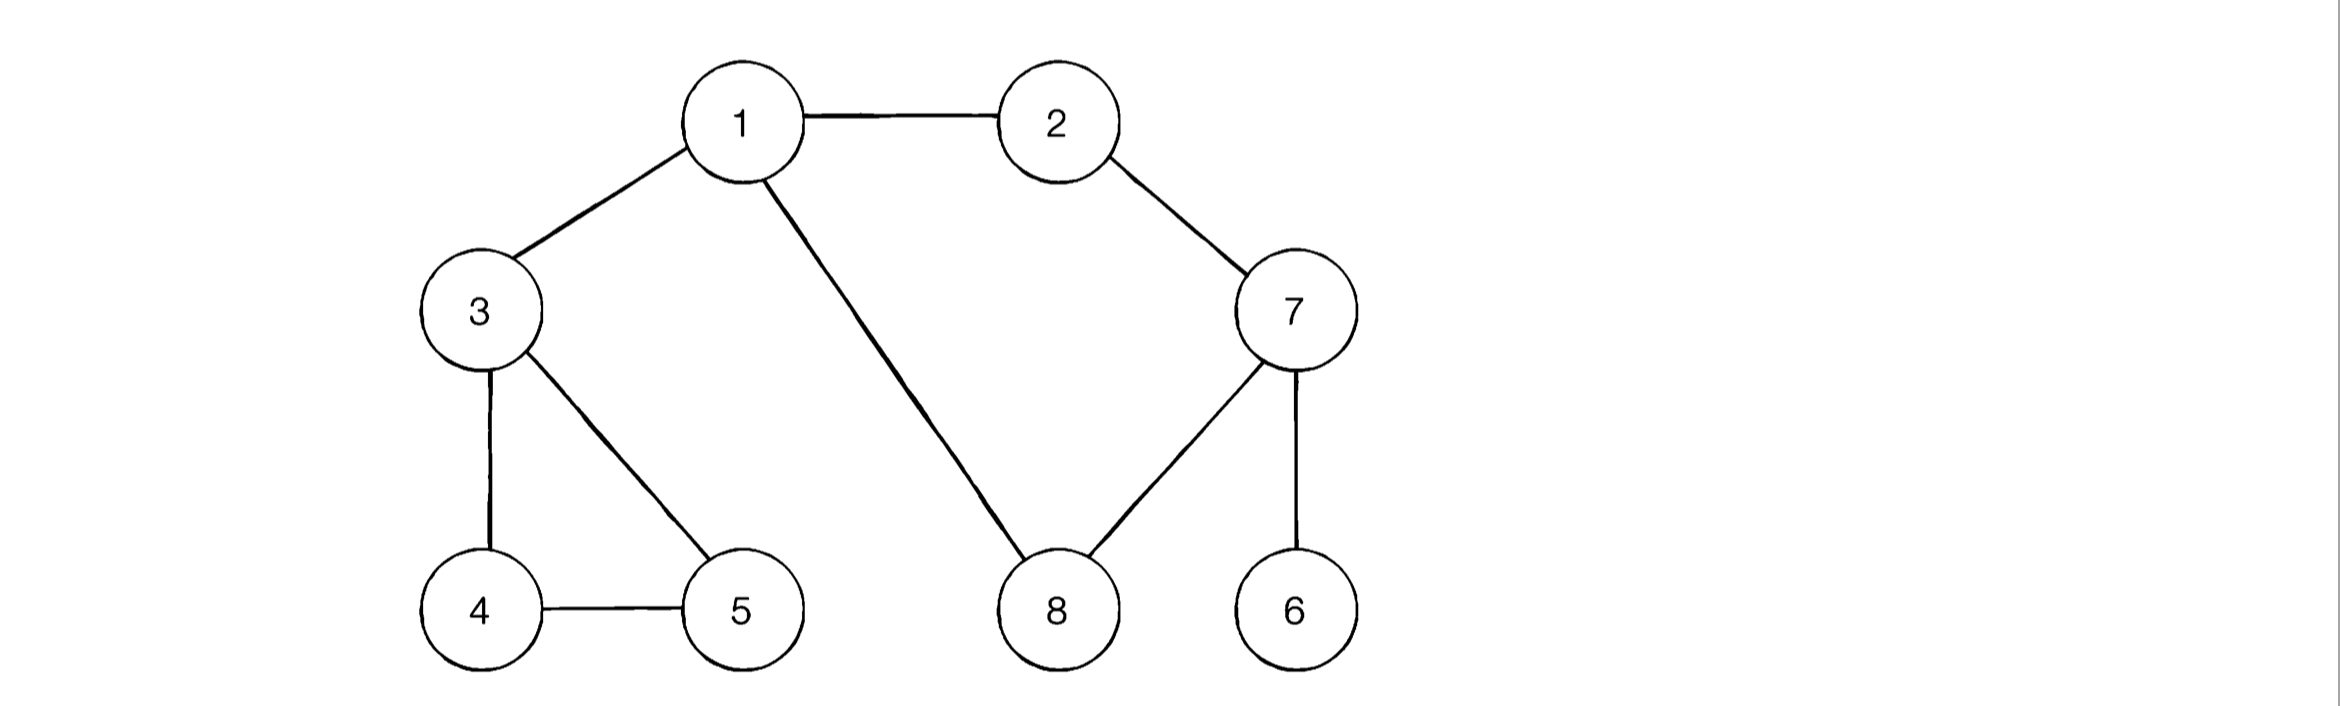
1. 탐색 시작 노드를 큐에 삽입하고 방문 처리.
2. 큐에서 노드를 꺼내 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리
3. 2번 과정을 더 이상 수행할 수 없을 때까지 반복.

BFS는 <b>큐 자료구조</b>에 기초한다는 점에서 구현이 간단<br>
수행시간이 DFS보다 좋은 편

In [19]:
from collections import deque

def bfs(graph, start, visited):
    # Queue 구현으로 deque 사용
    queue = deque([start])
    
    # 현재 노드 방문 처리
    visited[start] = True
    
    # queue가 빌 때까지 반복
    while queue:
        print(queue)
        v = queue.popleft()
        print(v, end = ' ')
        
        # 해당 원소와 연결된, 방문하지 않은 원소를 큐에 입력
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

In [20]:
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

visited = [False] * 9

print(f"graph : {graph}")
print(f"visited : {visited}")

graph : [[], [2, 3, 8], [1, 7], [1, 4, 5], [3, 5], [3, 4], [7], [2, 6, 8], [1, 7]]
visited : [False, False, False, False, False, False, False, False, False]


In [21]:
bfs(graph, 1, visited)

deque([1])
1 deque([2, 3, 8])
2 deque([3, 8, 7])
3 deque([8, 7, 4, 5])
8 deque([7, 4, 5])
7 deque([4, 5, 6])
4 deque([5, 6])
5 deque([6])
6 

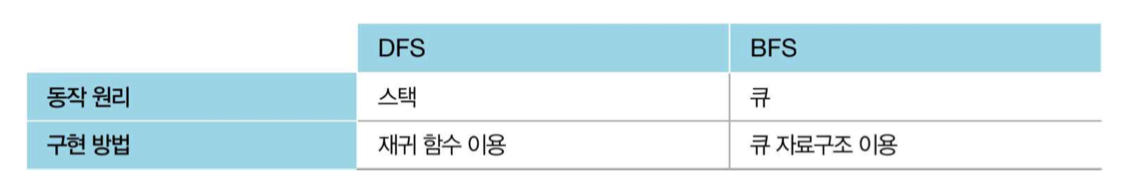